In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [7]:
# Drop irrelevant or high-missing features

# Fill missing 'bmi' values with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Fill missing 'smoking_status' with 'Unknown'
df['smoking_status'] = df['smoking_status'].fillna('Unknown')


# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = df['smoking_status'].fillna('unknown')
df['smoking_status'] = le.fit_transform(df['smoking_status'])


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy: 0.9393346379647749


🔹 Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.23      0.18      0.20        62

    accuracy                           0.91      1022
   macro avg       0.59      0.57      0.58      1022
weighted avg       0.90      0.91      0.91      1022

Accuracy: 0.913894324853229


🔹 Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg 

C:\Ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Ana\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Prec

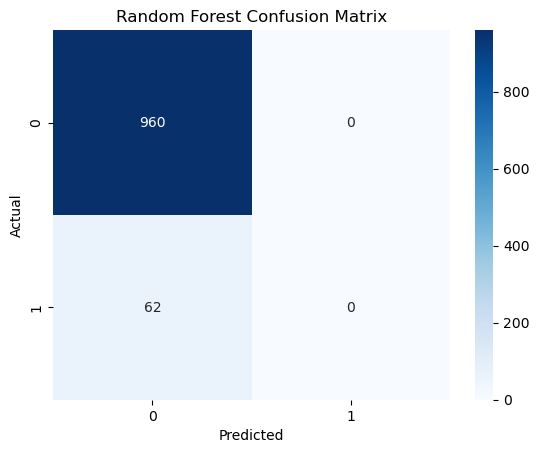

In [9]:


# ✅ Step 5: Split Data
X = df.drop('stroke', axis=1)
y = df['stroke']

# ✅ Step 6: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 8: Train Models

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# ✅ Step 9: Evaluate Models

print("🔹 Logistic Regression")
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\n")

print("🔹 Decision Tree")
print(classification_report(y_test, dt_pred))
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("\n")

print("🔹 Random Forest")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\n")

# ✅ Optional: Confusion Matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("🔹 Random Forest")
print(classification_report(y_test, rf_pred, zero_division=1))
print("Accuracy:", accuracy_score(y_test, rf_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

